In [ ]:
"""
================
Precision-Recall
================

Example of Precision-Recall metric to evaluate classifier output quality.

In information retrieval, precision is a measure of result relevancy, while
recall is a measure of how many truly relevant results are returned. A high
area under the curve represents both high recall and high precision, where high
precision relates to a low false positive rate, and high recall relates to a
low false negative rate. High scores for both show that the classifier is
returning accurate results (high precision), as well as returning a majority of
all positive results (high recall).

A system with high recall but low precision returns many results, but most of
its predicted labels are incorrect when compared to the training labels. A
system with high precision but low recall is just the opposite, returning very
few results, but most of its predicted labels are correct when compared to the
training labels. An ideal system with high precision and high recall will
return many results, with all results labeled correctly.

Precision (:math:`P`) is defined as the number of true positives (:math:`T_p`)
over the number of true positives plus the number of false positives
(:math:`F_p`).

:math:`P = \\frac{T_p}{T_p+F_p}`

Recall (:math:`R`) is defined as the number of true positives (:math:`T_p`)
over the number of true positives plus the number of false negatives
(:math:`F_n`).

:math:`R = \\frac{T_p}{T_p + F_n}`

These quantities are also related to the (:math:`F_1`) score, which is defined
as the harmonic mean of precision and recall.

:math:`F1 = 2\\frac{P \\times R}{P+R}`

It is important to note that the precision may not decrease with recall. The
definition of precision (:math:`\\frac{T_p}{T_p + F_p}`) shows that lowering
the threshold of a classifier may increase the denominator, by increasing the
number of results returned. If the threshold was previously set too high, the
new results may all be true positives, which will increase precision. If the
previous threshold was about right or too low, further lowering the threshold
will introduce false positives, decreasing precision.

Recall is defined as :math:`\\frac{T_p}{T_p+F_n}`, where :math:`T_p+F_n` does
not depend on the classifier threshold. This means that lowering the classifier
threshold may increase recall, by increasing the number of true positive
results. It is also possible that lowering the threshold may leave recall
unchanged, while the precision fluctuates.

The relationship between recall and precision can be observed in the
stairstep area of the plot - at the edges of these steps a small change
in the threshold considerably reduces precision, with only a minor gain in
recall. See the corner at recall = .59, precision = .8 for an example of this
phenomenon.

Precision-recall curves are typically used in binary classification to study
the output of a classifier. In order to extend Precision-recall curve and
average precision to multi-class or multi-label classification, it is necessary
to binarize the output. One curve can be drawn per label, but one can also draw
a precision-recall curve by considering each element of the label indicator
matrix as a binary prediction (micro-averaging).

.. note::

    See also :func:`sklearn.metrics.average_precision_score`,
             :func:`sklearn.metrics.recall_score`,
             :func:`sklearn.metrics.precision_score`,
             :func:`sklearn.metrics.f1_score`
"""

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

In [21]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

y[range(0,4)+range(90,94)+range(130,134)]

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [22]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
y[ range(0,4)+range(90,94)+range(130,134),:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

/home/takanori/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


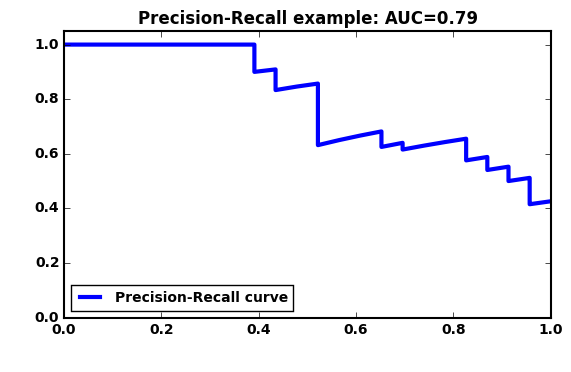

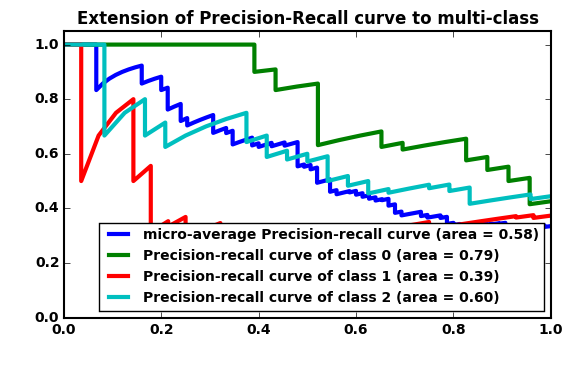

In [23]:
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Run classifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")

# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()